In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('coins.png')
img2 = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow('Coins', img)
cv2.imshow('Threshold', thresh)
cv2.imwrite('threshold.png', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img2[markers == -1] = [255,0,0]
cv2.imshow('img',img2)
cv2.imwrite('Result.png', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'np' is not defined

(<Axes: title={'center': 'Result'}>,
 ([], []),
 ([], []))

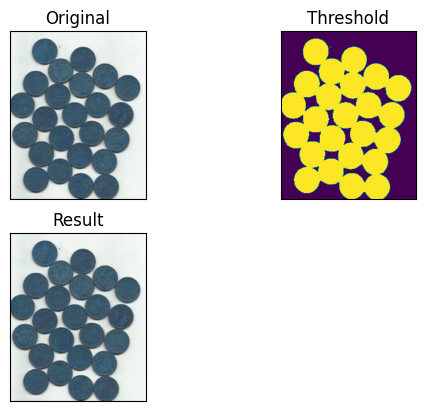

In [ ]:
plt.subplot(221, title = 'Original'), plt.imshow(img2), plt.xticks([]), plt.yticks([])
plt.subplot(222, title = 'Threshold'), plt.imshow(thresh), plt.xticks([]), plt.yticks([])
plt.subplot(223, title = 'Result'), plt.imshow(img), plt.xticks([]), plt.yticks([])